In [1]:
import tensorflow as tf

In [353]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp
import collections
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
mpl.rcParams['figure.dpi'] = 300
plt.rcParams.update({'font.weight': 'normal'})
plt.rcParams.update({'font.size': 20})
plt.rcParams.update({'lines.linewidth' : 2})

# GP Data Generator

In [ ]:
class Gaussian_Process(object):
    """
    Class used to sample GPs and train GPs.
    
    Uses sklearn.gaussian_process
    """
    
    def __init__(self, 
                )

def sample_gp(batch_size=10, max_context_points=5, ):
    """
    Samples GPs in batches.
    
    """

In [359]:
# function for sampling GPs
def rbf_kernel(x1, x2, s2=1, l=0.5):
    return s2 * np.exp(-1 * ((x1-x2) ** 2) / (2 * l ** 2))

def per_kernel(x1, x2, s2=1, p=2, l=0.5):
    return s2 * np.exp(-1 * (2 * np.sin(np.pi * np.abs(x1 - x2) * 1/p) ** 2) / l ** 2)

def gram_matrix(xs, kernel='rbf', l=0.5):
    if kernel == 'rbf':
        gram = [[rbf_kernel(x1,x2,l=l) for x2 in xs] for x1 in xs]
    elif kernel == 'per':
        gram = [[per_kernel(x1,x2,l=l) for x2 in xs] for x1 in xs]
    return gram

## SQ EXP GP

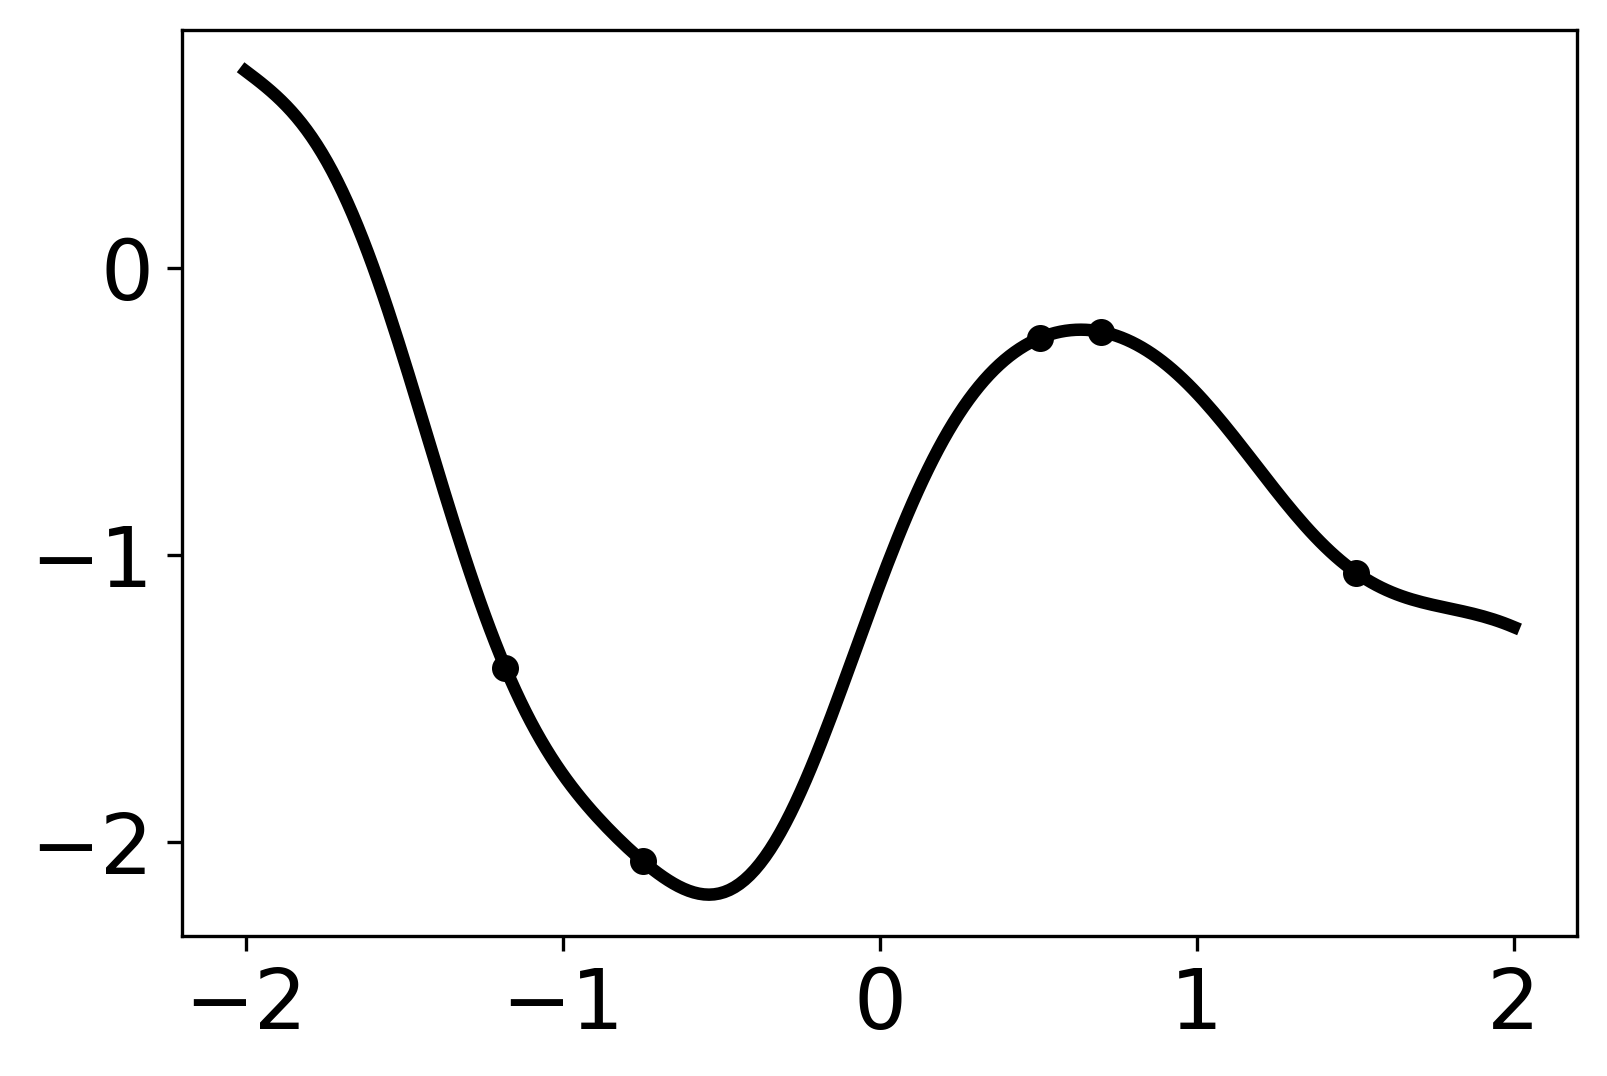

In [347]:
np.random.seed(3)

# simple sample of a GP with sqexp kernel
num_points = 250
xs = np.linspace(-2, 2, num_points)
mean = [0 for x in xs]
covar = gram_matrix(xs, l=0.5)

ys = np.random.multivariate_normal(mean, covar)

# sample some points to train models on
small_sample = np.random.randint(low=0, high=num_points, size=5)
big_sample = np.random.randint(low=0, high=num_points, size=45)
xs_small = xs[small_sample]
ys_small = ys[small_sample]
xs_big = np.concatenate((xs_small, xs[big_sample]))
ys_big = np.concatenate((ys_small, ys[big_sample]))
plt.plot(xs, ys, 'k', lw=3, zorder=9)
plt.scatter(xs_small, ys_small, c='k', s=30, zorder=10)
#plt.plot(xs_big, ys_big, 'o')
plt.show()

RBF(length_scale=0.522)
RBF(length_scale=0.727)


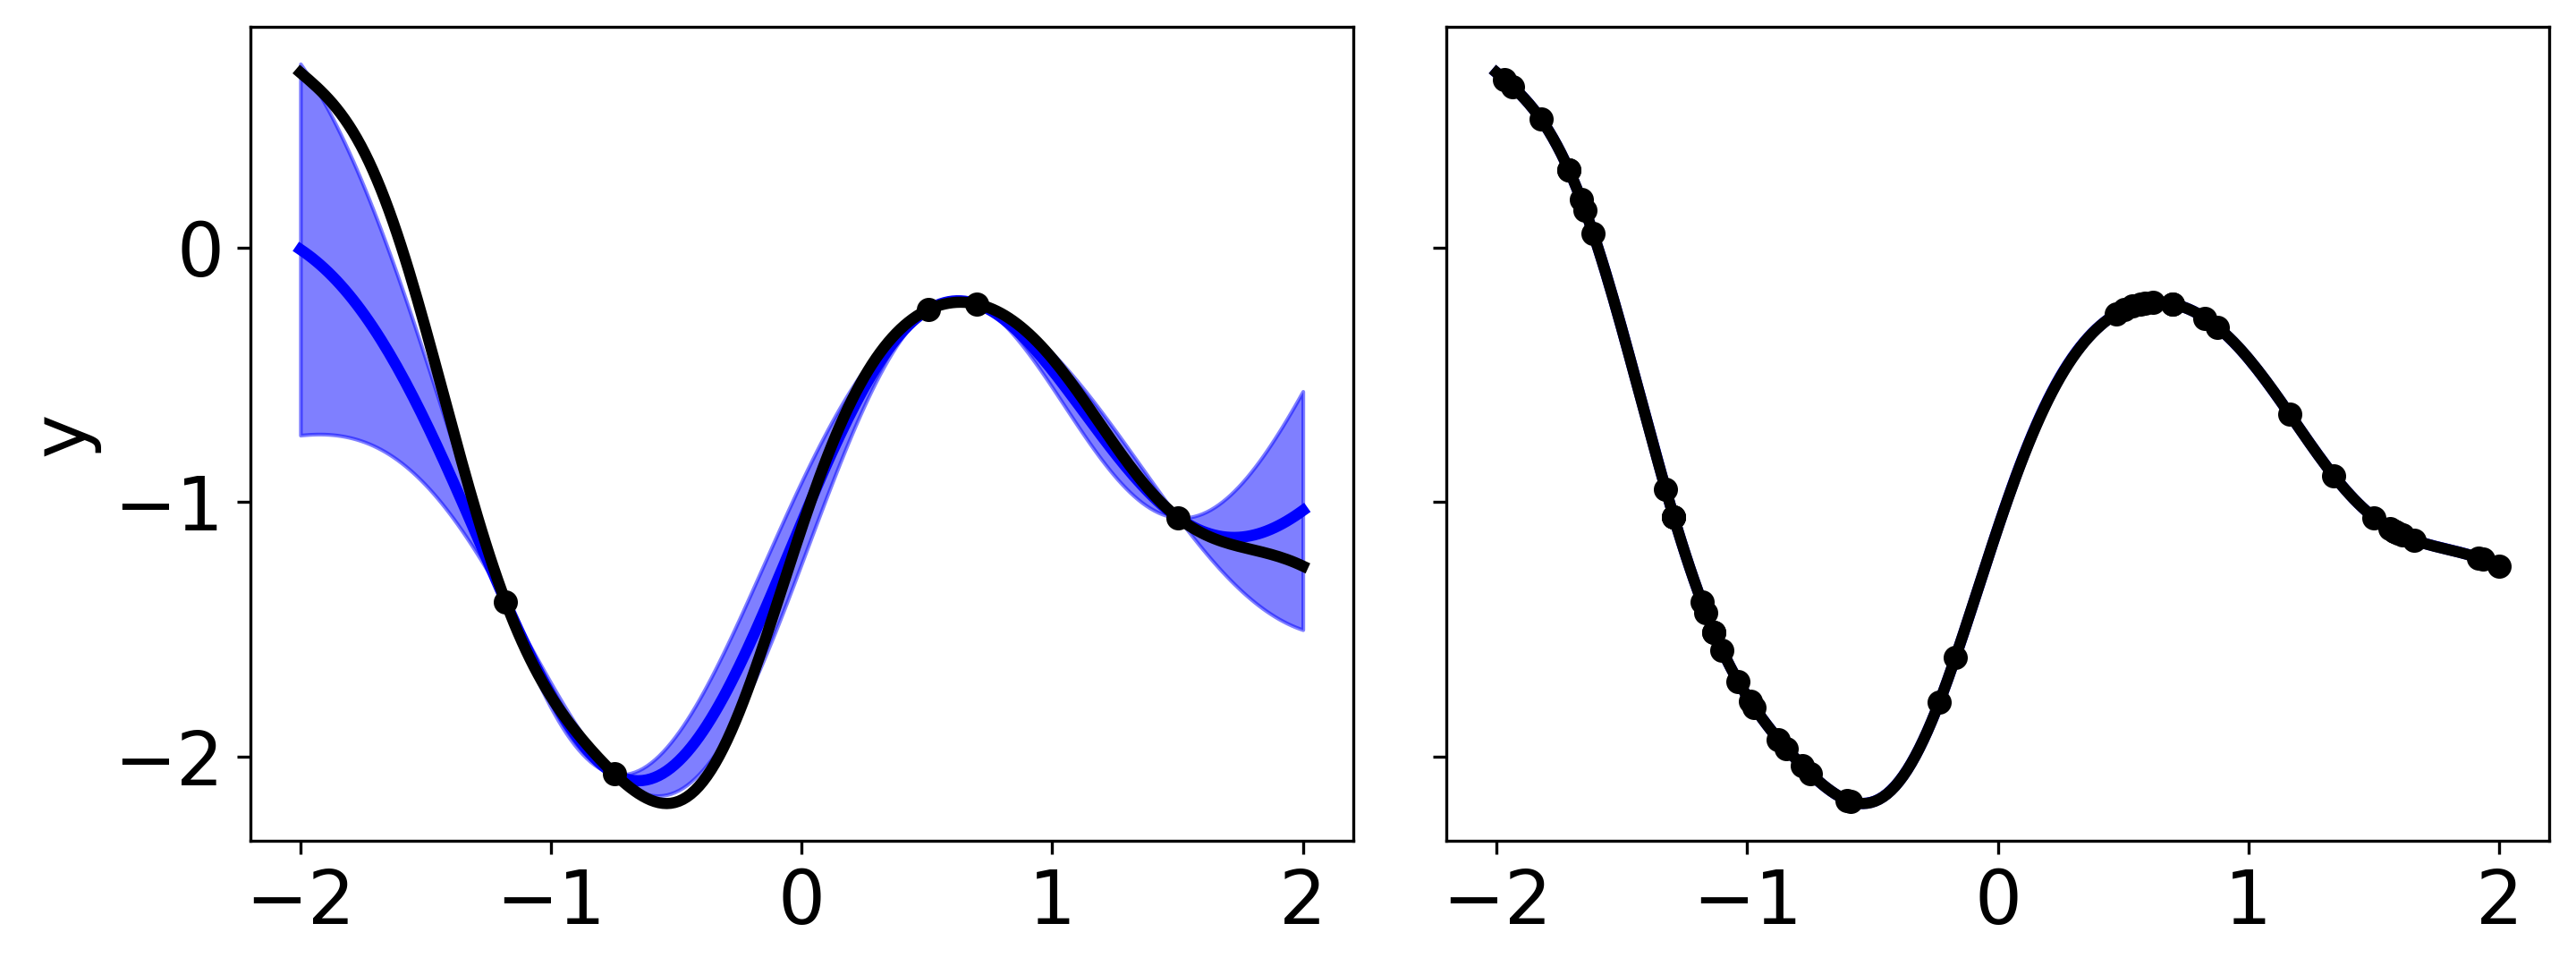

In [352]:
# solve with a GP

np.random.seed(0)
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

fig, [ax1, ax2] = plt.subplots(1,2, figsize=(10,4), sharey=True)
X_big = xs_big[:, np.newaxis]
y_big = ys_big
kernel = RBF(length_scale=0.1, length_scale_bounds=(1e-3, 1e3))
gp = GaussianProcessRegressor(kernel=kernel,
                              alpha=1e-6).fit(X_big, y_big)
print(gp.kernel_)
X_ = xs
y_mean, y_cov = gp.predict(X_[:, np.newaxis], return_cov=True)
ax2.plot(X_, y_mean, 'b', lw=3, zorder=9)
ax2.fill_between(X_, y_mean - np.sqrt(np.diag(y_cov)),
                 y_mean + np.sqrt(np.diag(y_cov)),
                 alpha=0.5, color='b')
ax2.plot(X_, ys, 'k', lw=3, zorder=9)
ax2.scatter(X_big[:, 0], y_big, c='k', s=30, zorder=10)
ax2.set_xticks(np.arange(-2,3))

X_small = xs_small[:, np.newaxis]
y_small = ys_small
kernel = RBF(length_scale=0.1, length_scale_bounds=(1e-3, 1e3))
gp = GaussianProcessRegressor(kernel=kernel,
                              alpha=1e-6).fit(X_small, y_small)
X_ = xs
y_mean, y_cov = gp.predict(X_[:, np.newaxis], return_cov=True)
ax1.plot(X_, y_mean, 'b', lw=3, zorder=9)
ax1.fill_between(X_, y_mean - np.sqrt(np.diag(y_cov)),
                 y_mean + np.sqrt(np.diag(y_cov)),
                 alpha=0.5, color='b')
ax1.plot(X_, ys, 'k', lw=3, zorder=9)
ax1.scatter(X_small[:, 0], y_small, c='k', s=30, zorder=10)
ax1.set_xticks(np.arange(-2,3))
ax1.set_ylabel('y')
fig.tight_layout()
print(gp.kernel_)

## Multiple Kernels

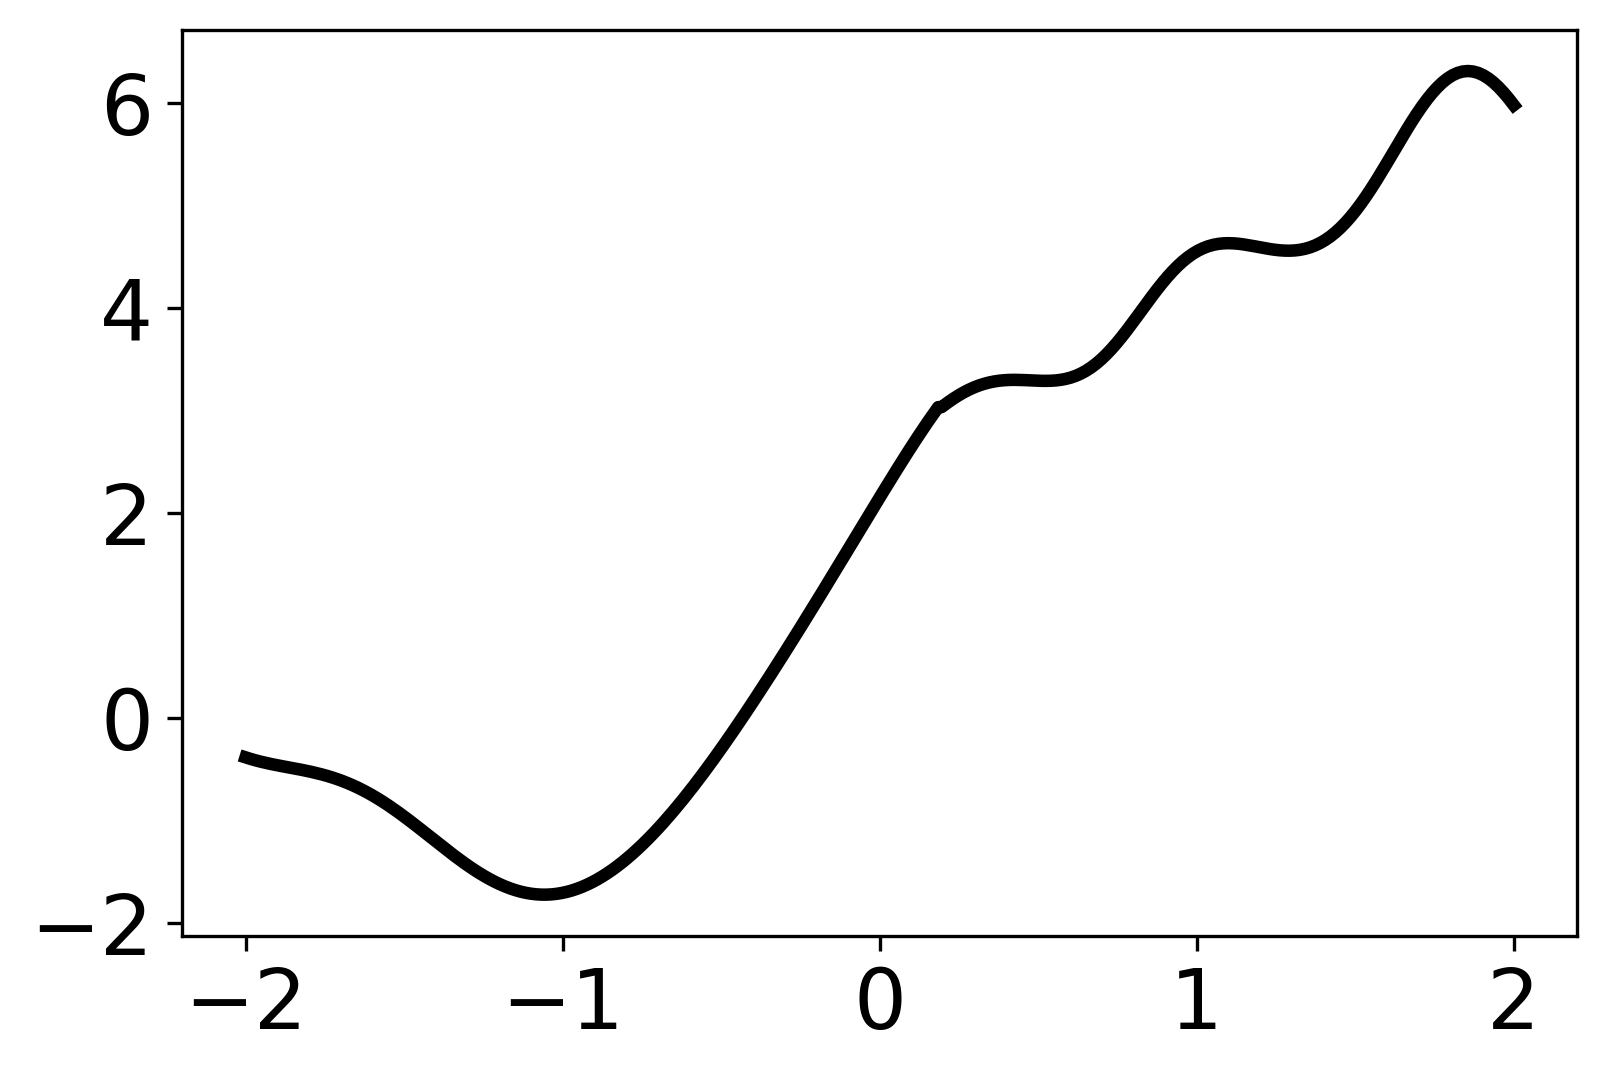

In [372]:
np.random.seed(0)

# simple sample of a GP with sqexp kernel
num_points = 250
xs = np.linspace(-2, 2, num_points)
switch_kernel = np.random.uniform(-2, 2)
xs = np.sort(np.append(xs, switch_kernel))
xs_low = xs[xs < switch_kernel]
xs_high = xs[xs >= switch_kernel]

mean_low = [0 for x in xs_low]
mean_high = [0 for x in xs_high]
covar_low = gram_matrix(xs_low, kernel='rbf', l=0.5)
covar_high = gram_matrix(xs_high, kernel='rbf', l=0.3)

ys_low = np.random.multivariate_normal(mean_low, covar_low)
ys_high = np.random.multivariate_normal(mean_high, covar_high)
diff = ys_low[-1] - ys_high[0]
ys_high += diff
ys = np.concatenate((ys_low, ys_high))

# sample some points to train models on
small_sample = np.random.randint(low=0, high=num_points, size=5)
big_sample = np.random.randint(low=0, high=num_points, size=45)
xs_small = xs[small_sample]
ys_small = ys[small_sample]
xs_big = np.concatenate((xs_small, xs[big_sample]))
ys_big = np.concatenate((ys_small, ys[big_sample]))
plt.plot(xs, ys, 'k',lw=3)
#plt.scatter(xs_small, ys_small, c='k', s=30, zorder=10)
#plt.plot(xs_big, ys_big, 'o')
plt.show()